### 1.To compute and analyze basic statistical measures for numerical columns in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df=pd.read_csv("sales_data_with_discounts.csv")

In [3]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [39]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols


['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [40]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [7]:
print("Volume")
print(f"Mean: {df.Volume.mean()}\nMedian: {df.Volume.median()}\nMode: {df.Volume.mode()[0]}\nStd Dev: {df.Volume.std()}\n")
print("Avg Price")
print(f"Mean: {df['Avg Price'].mean()}\nMedian: {df['Avg Price'].median()}\nMode: {df['Avg Price'].mode()[0]}\nStd Dev: {df['Avg Price'].std()}\n")
print("Total Sales Value")
print(f"Mean: {df['Total Sales Value'].mean()}\nMedian: {df['Total Sales Value'].median()}\nMode: {df['Total Sales Value'].mode()[0]}\nStd Dev: {df['Total Sales Value'].std()}\n")
print("Discount Rate (%)")
print(f"Mean: {df['Discount Rate (%)'].mean()}\nMedian: {df['Discount Rate (%)'].median()}\nMode: {df['Discount Rate (%)'].mode()[0]}\nStd Dev: {df['Discount Rate (%)'].std()}\n")
print("Discount Amount")
print(f"Mean: {df['Discount Amount'].mean()}\nMedian: {df['Discount Amount'].median()}\nMode: {df['Discount Amount'].mode()[0]}\nStd Dev: {df['Discount Amount'].std()}\n")
print("Net Sales Value")
print(f"Mean: {df['Net Sales Value'].mean()}\nMedian: {df['Net Sales Value'].median()}\nMode: {df['Net Sales Value'].mode()[0]}\nStd Dev: {df['Net Sales Value'].std()}\n")

Volume
Mean: 5.066666666666666
Median: 4.0
Mode: 3
Std Dev: 4.231602391213926

Avg Price
Mean: 10453.433333333332
Median: 1450.0
Mode: 400
Std Dev: 18079.90483993645

Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Mode: 24300
Std Dev: 50535.07417255328

Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Mode: 5.007822189204133
Std Dev: 4.220602153325511

Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Mode: 69.17794228822787
Std Dev: 4509.9029633539985

Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Mode: 326.97480055470817
Std Dev: 46358.656624066934



### 2.To visualize the distribution and relationship of numerical and categorical variables in the dataset.

## histogram

Text(0.5, 1.0, 'Volume')

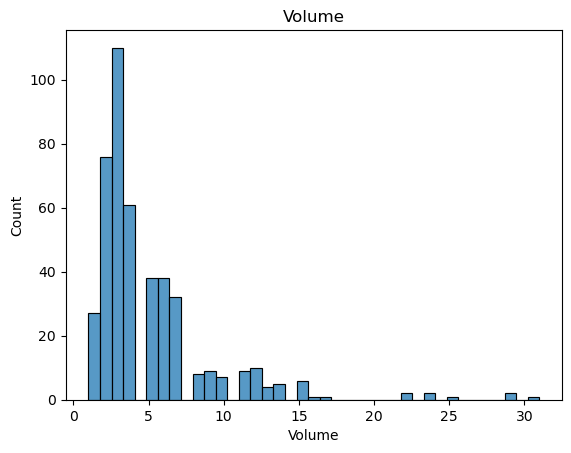

In [8]:
sns.histplot(data=df,x='Volume')
plt.title('Volume')

Text(0.5, 1.0, 'Avg Price')

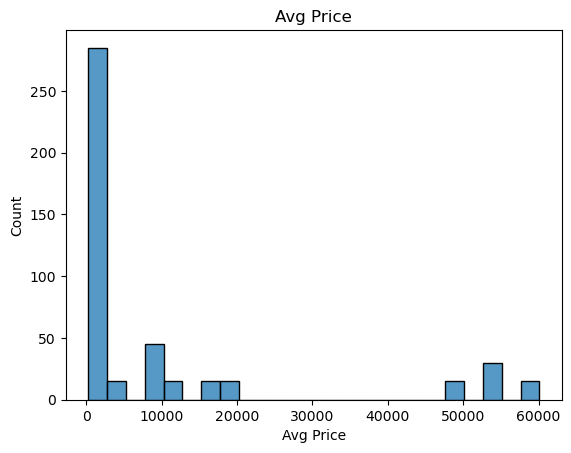

In [9]:
sns.histplot(data=df,x='Avg Price')
plt.title('Avg Price')

Text(0.5, 1.0, 'Total Sales Value')

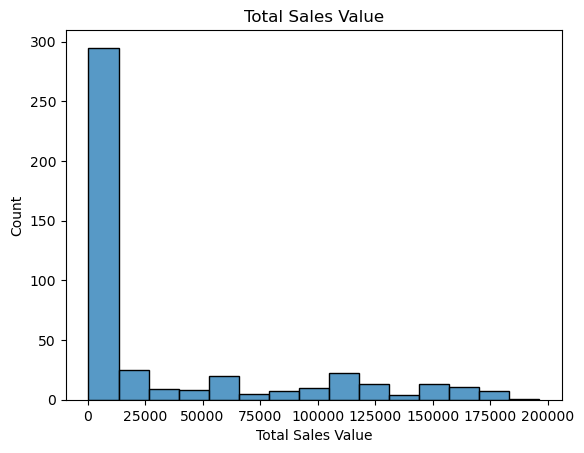

In [10]:
sns.histplot(data=df,x='Total Sales Value')
plt.title('Total Sales Value')

Text(0.5, 1.0, 'Discount Rate (%)')

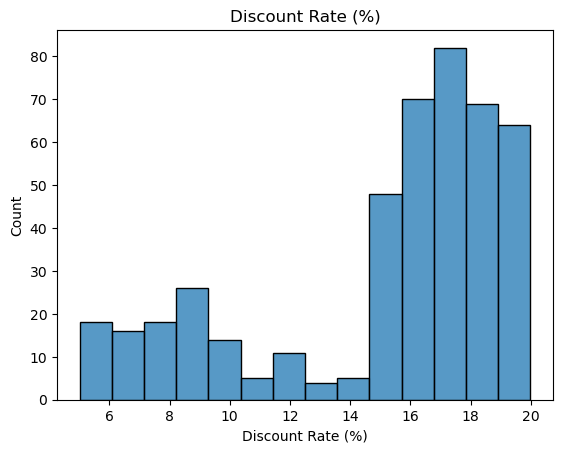

In [11]:
sns.histplot(data=df,x='Discount Rate (%)')
plt.title('Discount Rate (%)')

Text(0.5, 1.0, 'Discount Amount')

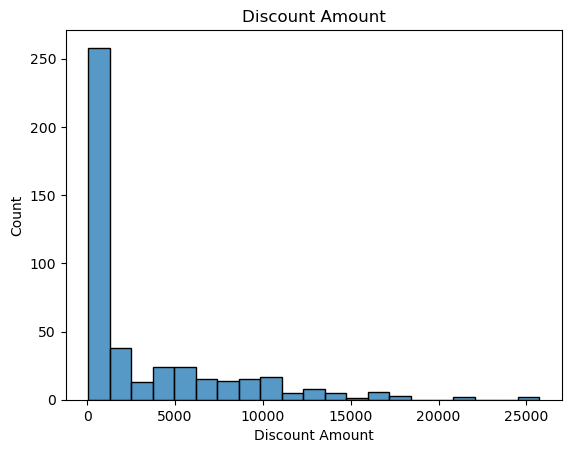

In [12]:
sns.histplot(data=df,x='Discount Amount')
plt.title('Discount Amount')

Text(0.5, 1.0, 'Net Sales Value')

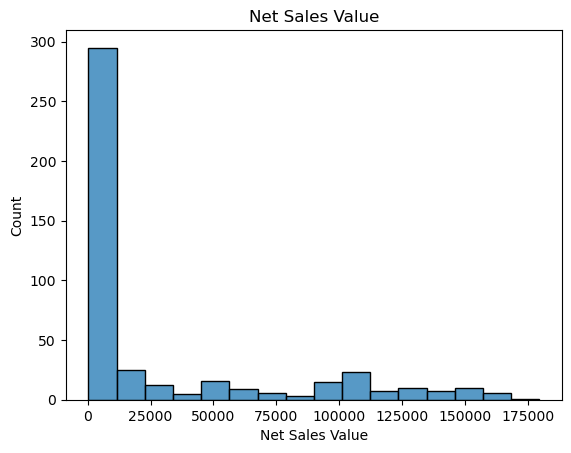

In [13]:
sns.histplot(data=df,x='Net Sales Value')
plt.title('Net Sales Value')

### Boxplots

Text(0.5, 1.0, 'Volume')

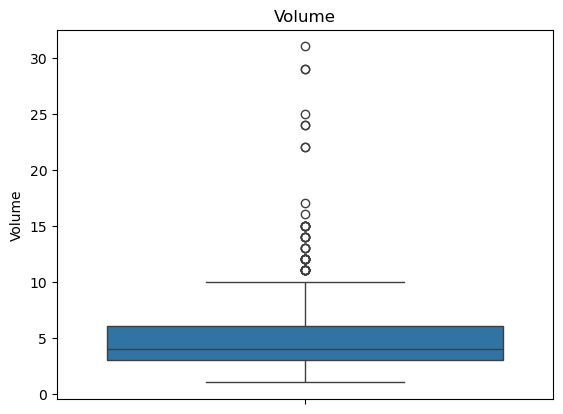

In [14]:
sns.boxplot(data=df,y='Volume')
plt.title('Volume')

Text(0.5, 1.0, 'Avg Price')

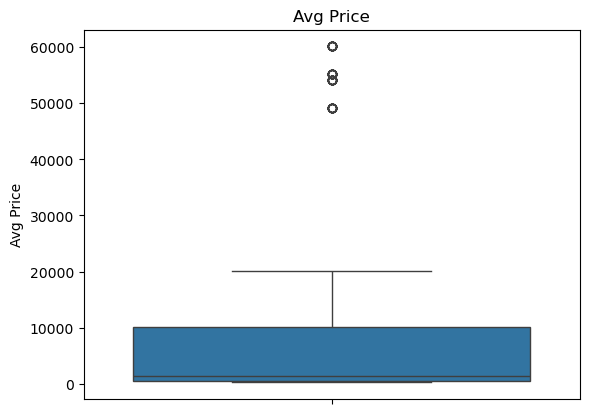

In [15]:
sns.boxplot(data=df,y='Avg Price')
plt.title('Avg Price')

Text(0.5, 1.0, 'Total Sales Value')

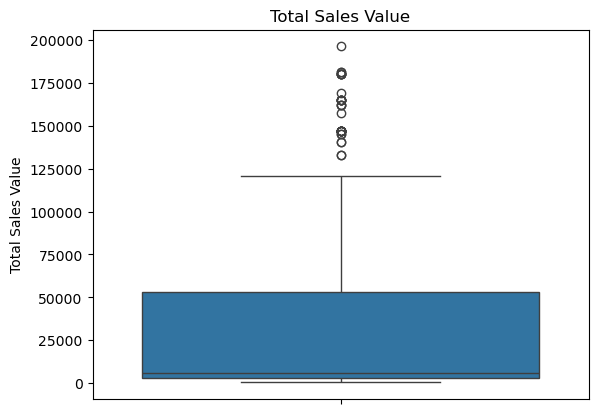

In [16]:
sns.boxplot(data=df,y='Total Sales Value')
plt.title('Total Sales Value')

Text(0.5, 1.0, 'Discount Rate (%)')

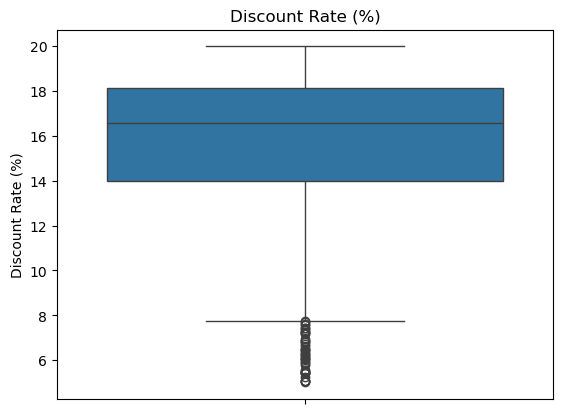

In [17]:
sns.boxplot(data=df,y='Discount Rate (%)')
plt.title('Discount Rate (%)')

Text(0.5, 1.0, 'Discount Amount')

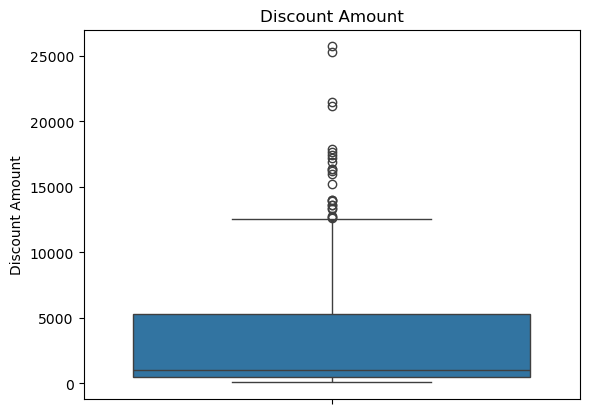

In [18]:
sns.boxplot(data=df,y='Discount Amount')
plt.title('Discount Amount')

Text(0.5, 1.0, 'Net Sales Value')

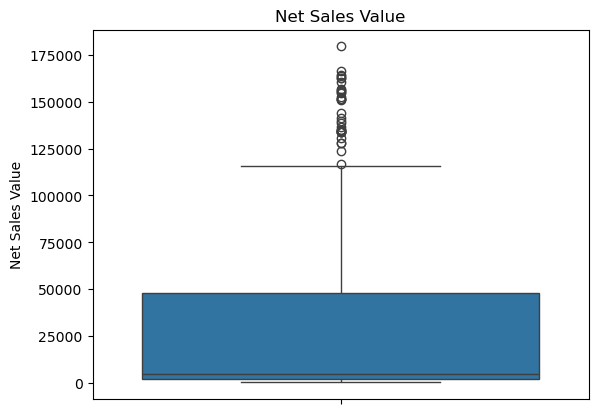

In [19]:
sns.boxplot(data=df,y='Net Sales Value')
plt.title('Net Sales Value')

### Bar Chart

In [20]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


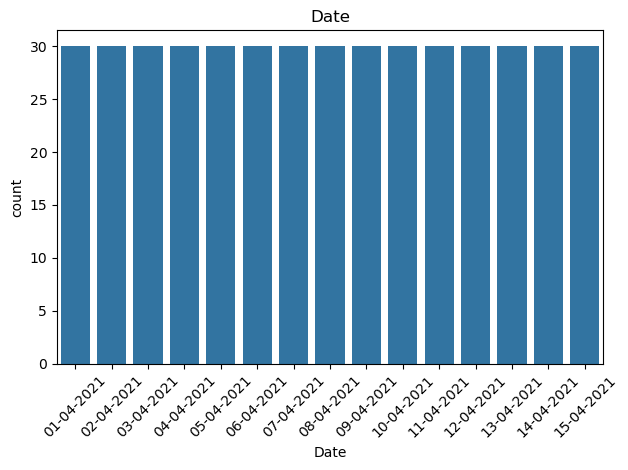

In [21]:
sns.countplot(data=df, x='Date')
plt.title('Date')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Day')

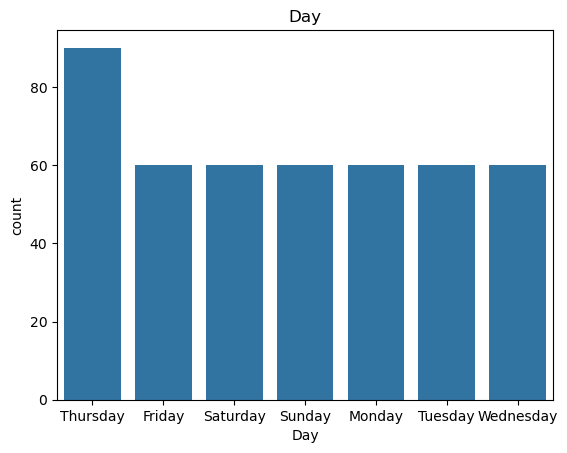

In [22]:
sns.countplot(data=df, x='Day')
plt.title('Day')

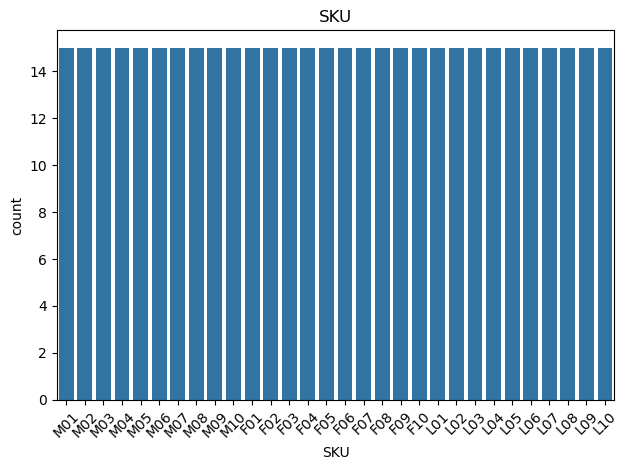

In [23]:
sns.countplot(data=df, x='SKU')
plt.title('SKU')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'City')

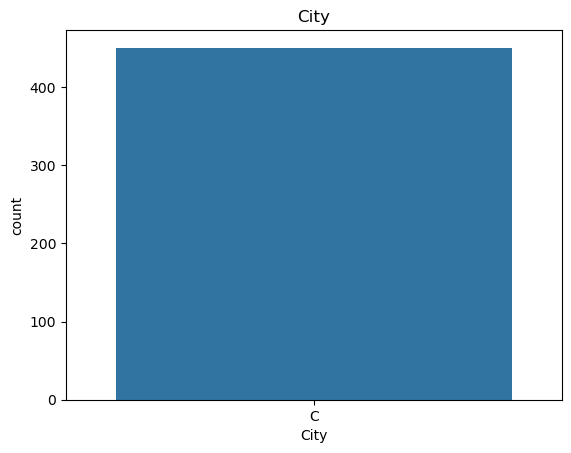

In [24]:
sns.countplot(data=df, x='City')
plt.title('City')

Text(0.5, 1.0, 'BU')

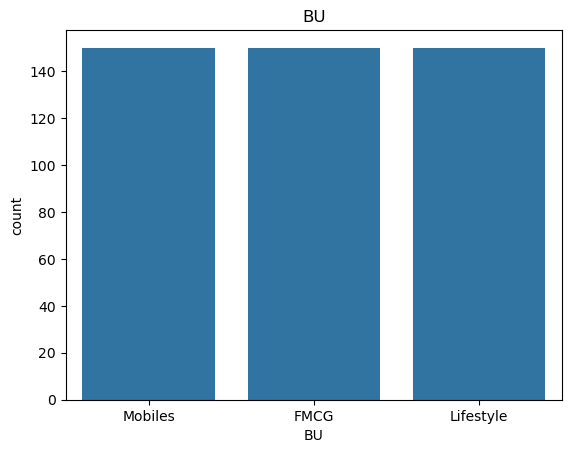

In [25]:
sns.countplot(data=df, x='BU')
plt.title('BU')

Text(0.5, 1.0, 'Brand')

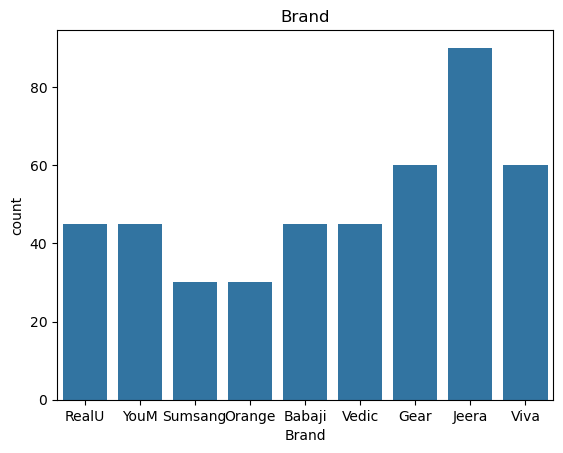

In [26]:
sns.countplot(data=df, x='Brand')
plt.title('Brand')

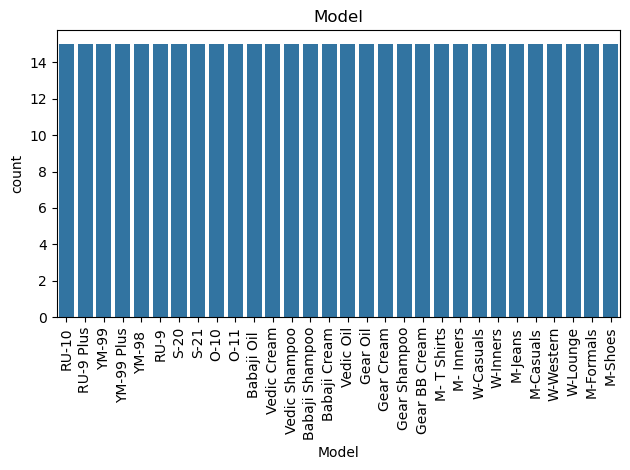

In [27]:
sns.countplot(data=df, x='Model')
plt.title('Model')
plt.xticks(rotation=90)
plt.tight_layout()

### 3.To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

In [28]:
print("Volume\n")
standardized_copy=df.copy()
mean = df['Volume'].mean()
std = df['Volume'].std()
standardized_copy['Volume'] = (df['Volume']- mean) / std
print(standardized_copy['Volume'])

Volume

0      2.347417
1      1.165831
2      0.456880
3      0.220563
4     -0.488389
         ...   
445   -0.724706
446    0.220563
447   -0.724706
448   -0.488389
449   -0.961023
Name: Volume, Length: 450, dtype: float64


In [29]:
print("Avg Price\n")
standardized_copy=df.copy()
mean = df['Avg Price'].mean()
std = df['Avg Price'].std()
standardized_copy['Avg Price'] = (df['Avg Price']- mean) / std
print(standardized_copy['Avg Price'])

Avg Price

0      0.091072
1     -0.019548
2      0.312312
3      0.533552
4     -0.130168
         ...   
445   -0.506277
446   -0.434374
447   -0.489684
448   -0.473091
449   -0.406719
Name: Avg Price, Length: 450, dtype: float64


In [30]:
print("Total Sales Value\n")
standardized_copy=df.copy()
mean = df['Total Sales Value'].mean()
std = df['Total Sales Value'].std()
standardized_copy['Total Sales Value'] = (df['Total Sales Value']- mean) / std
print(standardized_copy['Total Sales Value'])

Total Sales Value

0      2.922469
1      1.329516
2      1.561038
3      1.717365
4     -0.188242
         ...   
445   -0.617647
446   -0.360400
447   -0.605774
448   -0.556303
449   -0.607753
Name: Total Sales Value, Length: 450, dtype: float64


In [31]:
print("Discount Rate (%)\n")
standardized_copy=df.copy()
mean = df['Discount Rate (%)'].mean()
std = df['Discount Rate (%)'].std()
standardized_copy['Discount Rate (%)'] = (df['Discount Rate (%)']- mean) / std
print(standardized_copy['Discount Rate (%)'])

Discount Rate (%)

0     -0.829365
1     -0.851714
2     -1.350129
3     -1.947555
4      0.672990
         ...   
445    0.075924
446    0.450596
447    0.902788
448    0.388042
449    0.042188
Name: Discount Rate (%), Length: 450, dtype: float64


In [32]:
print("Discount Amount\n")
standardized_copy=df.copy()
mean = df['Discount Amount'].mean()
std = df['Discount Amount'].std()
standardized_copy['Discount Amount'] = (df['Discount Amount']- mean) / std
print(standardized_copy['Discount Amount'])

Discount Amount

0      3.948422
1      1.846958
2      1.621190
3      1.112568
4      0.227598
         ...   
445   -0.652815
446   -0.152022
447   -0.607464
448   -0.529789
449   -0.636636
Name: Discount Amount, Length: 450, dtype: float64


In [33]:
print("Net Sales Value\n")
standardized_copy=df.copy()
mean = df['Net Sales Value'].mean()
std = df['Net Sales Value'].std()
standardized_copy['Net Sales Value'] = (df['Net Sales Value']- mean) / std
print(standardized_copy['Net Sales Value'])

Net Sales Value

0      2.801638
1      1.269613
2      1.543957
3      1.763847
4     -0.227342
         ...   
445   -0.609783
446   -0.378079
447   -0.601252
448   -0.554881
449   -0.600571
Name: Net Sales Value, Length: 450, dtype: float64


In [ ]:
# Conversion of Categorical Data into Dummy Variables

In [42]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
categorical_cols=['Date','Day','SKU','City','BU','Brand','Model']
one_hot=OneHotEncoder(sparse_output=False)
encoded_array=one_hot.fit_transform(df[categorical_cols])
df1=pd.DataFrame(encoded_array,columns=one_hot.get_feature_names_out(categorical_cols))
df1.head()

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
